Импортируем нужные модули и инициализируем генератор случайных чисел

In [1]:
import random

import grapher
import analysis as a
import prng

%matplotlib inline

prng = prng.PRNG()

length = 10000

fake_random = [prng.next() for i in range(0, length)]
real_random = [random.random() for j in range(0, length)]

grapher.init()

Functions:		My realization	Native Realization
Mean:		0.5000665		0.4987254
Square mean:	0.3335674		0.3321384
Root Mean Square:	0.5775529		0.5763145
Variance:		0.0835008		0.0834114
SQRT Variance:	0.2889651		0.2888103
Skewness:		0.0125434		-0.002148
Kurtosis:		1.8002865		1.7933826



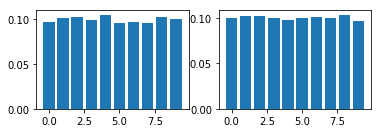

In [3]:
print("Functions:\t\t{0}\t{1}".format("My realization",
                                      "Native Realization"))
print("Mean:\t\t{0}\t\t{1}".format(round(a.mean(fake_random), 7),
                                   round(a.mean(real_random), 7)))
print("Square mean:\t{0}\t\t{1}".format(round(a.square_mean(fake_random), 7),
                                        round(a.square_mean(real_random), 7)))
print("Root Mean Square:\t{0}\t\t{1}".format(round(a.root_mean_square(fake_random), 7),
                                             round(a.root_mean_square(real_random), 7)))
print("Variance:\t\t{0}\t\t{1}".format(round(a.variance(fake_random), 7),
                                       round(a.variance(real_random), 7)))
print("SQRT Variance:\t{0}\t\t{1}".format(round(a.sqrt_variance(fake_random), 7),
                                          round(a.sqrt_variance(real_random), 7)))
print("Skewness:\t\t{0}\t\t{1}".format(round(a.skewness(fake_random), 7),
                                       round(a.skewness(real_random), 7)))
print("Kurtosis:\t\t{0}\t\t{1}".format(round(a.kurtosis(fake_random), 7),
                                       round(a.kurtosis(real_random), 7)))
print()

grapher.set_subplot(subplot_number=1, x_arr=range(0, 10), y_arr=a.density(fake_random, 10), bar=True)
grapher.set_subplot(subplot_number=2, x_arr=range(0, 10), y_arr=a.density(real_random, 10), bar=True)

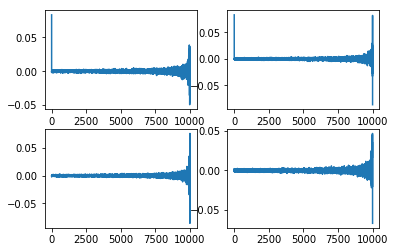

In [4]:
ac_fake = [a.autocorrelation(fake_random, i) for i in range(0, len(fake_random) - 1)]
ac_real = [a.autocorrelation(real_random, i) for i in range(0, len(fake_random) - 1)]
cca = [a.crosscorrelation(fake_random, real_random, i) for i in range(0, len(fake_random) - 1)]
ccb = [a.crosscorrelation(real_random, fake_random, i) for i in range(0, len(fake_random) - 1)]

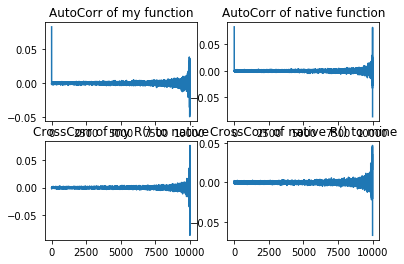

In [11]:
from importlib import reload
reload(grapher)
grapher.set_subplot(subplot_number=1, x_arr=range(0, len(fake_random) - 1), y_arr=ac_fake,
                    title='AutoCorr of my function')
grapher.set_subplot(subplot_number=2, x_arr=range(0, len(real_random) - 1), y_arr=ac_real,
                    title='AutoCorr of native function')
grapher.set_subplot(subplot_number=3, x_arr=range(0, len(fake_random) - 1), y_arr=cca,
                    title='CrossCorr of my R() to native')
grapher.set_subplot(subplot_number=4, x_arr=range(0, len(real_random) - 1), y_arr=ccb,
                    title='CrossCorr of native R() to mine')